In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# 가설 검정 문제
> ## - 동전을 1,000번 던졌는데, 앞면이 530번 나왔다. 이 동전은 휘어지지 않은 동전인가?

--------

# 1. 데이터가 어떤 고정된(fixed) 확률 분포를 가지는 확률 변수라고 가정한다. 

In [5]:
# 여러번 동전을 던져서 나오는 데이터는 이항확률 분포를 따른다고 가정하자.

--------

# 2. 이 확률 분포의 모수값이 특정한 값을 가진다고 가정한다.   
## 이 때 모수가 가지는 특정한 값은 우리가 검증하고자 하는 사실과 관련이 있어야 한다. 이러한 가정을 귀무 가설(null hypothesis)이라고 한다.

>  ***귀무 가설(null hypothesis)***
> - 검정하고 싶은 가설
- $H_0$  로 표기
- 데이터가 따르는 분포가 어떤 특정한 모수 값으로 고정되어 있다고 가정
- 반드시 등식(equality)으로 표현
    
    
> ***대립 가설(alternative hypothesis)***
>- 비교하고 싶은 가설
- $H_a$  로 표기 
- 보통 대립 가설은 모수의 값이 특정한 값보다 크거나 작은 것을 나타냄
- 대립 가설이 사실일 가능성이 높아지면 귀무 가설은 기각하게 된다.

In [6]:
# - 하나의 동전이 공평한 동전이라고 가정한다.
# - 앞면이 나올 확률 = p 일때,
# - 귀무 가설 : p = 0.5
# - 대립 가설 : p != 0.5

--------

# 3. 만약 데이터가 주어진 귀무 가설에 따른 표본이고 이 표본 데이터를 특정한 수식에 따라 계산한 숫자는 특정한 확률 분포를 따르게 된다. 이 숫자를 <font color=red>검정 통계량(test statistics)</font>라고 하며 검정 통계량의 확률 분포를  <font color=red>검정 통계 분포(test statistics distribution)</font>라고 한다.  검정 통계 분포의 종류 및 모수의 값은 처음에 정한 가설 및 수식에 의해 결정된다.

> ### 검정 통계량
- 귀무 가설이 맞거나 틀린 것을 증명할때 사용되는 증거가 되는 숫자.

> ### 예시
- 어떤 병에 걸렸다"라는 가설을 증명하려면 환자의 혈액을 채취하여 혈액 내의 **특정한 성분의 수치**를 측정해야 한다고 가정하자. 이 때 **해당 수치**가 바로 **검정 통계량**이 된다.
- 어떤 학생이 우등 상장을 받을 수 있는 우등생이다"라는 가설을 증명하려면 **시험 성적**을 측정하면 된다. 이 **시험 성적**을 **검정 통계량**이라고 부를 수 있다.

In [7]:
# 검정통계량은 표본 데이터에 따라 다르게 계산된다.
## 동전 던지기의 경우, 성공횟수를 검정 통계량으로 사용할 수 있다.
## 검정통계량 : 550회
## 검정 통계 분포 : 이항분포

# 4. 주어진 귀무 가설이 맞으면서도 표본 데이터에 의해서 실제로 계산된 검정통계량의 값과 같은 혹은 그보다 더 극단적인(extreme) 또는 더 희귀한(rare) 값이 나올 수 있는 확률을 계산한다. 이를 <font color=red>유의 확률(p-value)</font>이라고 한다.

> ### 유의 확률 ( p - value )
- 검정 통계량이 따르는 검정 통계량 분포를 알고 있다면 실제 데이터에서 계산한 검정 통계량 숫자가 분포에서 어느 부분쯤에 위치해 있는지를 알 수 있다. 이 위치를 나타내는 값이 바로 유의 확률(p-value) 이다.

In [8]:
# 연속 확률 변수에서 특정한 하나의 값이 나올 확률은 보통 0 이므로 검정통계량과 같은 값이 나올 확률을 구해도 0이므로 이 값은 유의 확률로 쓸 수 없다.
# 따라서 검정 통계량의 유의 확률은 검정 통계량과 같거나 더 극단적인(extreme) 또는 희귀한(rare) 값이 나올 수 있는 확률로 구한다. 
# 이 확률은 검정 통계 확률 분포 밀도 함수에서 꼬리(tail)부분에 해당하는 영역의 면적으로 계산한다.

- **[ 양측 검정인 경우 ]**

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/DisNormal06.svg" alt="Drawing" style="width: 600px;" align = "left"/>

In [9]:
## 검정통계량 : 530회
## 검정 통계 분포 : 이항분포

In [10]:
from scipy import stats

In [11]:
## 양측 검정
## 공정한 동전인지 아닌지 알고 싶을 때 우리는 530의 위치뿐만 아니라 470의 위치도 함께 고려해야한다.
## 유의확률은 사전에 가정한 확률 분포의 누적확률분포함수를 사용해서 구한다.

rv = stats.binom(1000, 0.5)
1-rv.cdf(530) + rv.cdf(470)

0.05785052237170863

In [12]:
1-rv.cdf(530)

0.026838924822515153

In [13]:
rv.ppf(1-rv.cdf(530))

469.0

In [14]:
rv.ppf(1-rv.cdf(469))

530.0

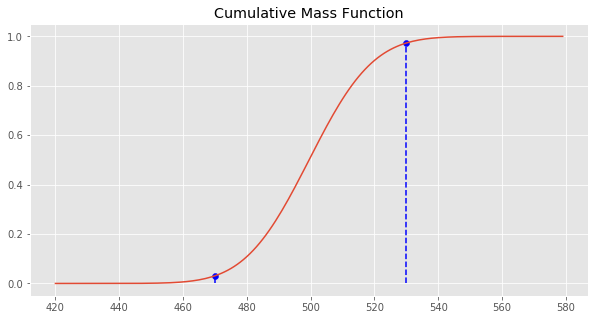

In [15]:
xs = [x for x in range(420, 580)]
plt.figure(figsize=(10, 5))
plt.plot(xs,[rv.cdf(x) for x in xs],'-')
plt.title('Cumulative Mass Function')
plt.scatter(530, rv.cdf(530), color = 'blue')
plt.scatter(470, rv.cdf(470), color = 'blue')
plt.vlines(530, ymin = 0, ymax=rv.cdf(530), linestyles='--', color = 'blue')
plt.vlines(470, ymin = 0, ymax=rv.cdf(470), linestyles='--', color = 'blue')
plt.show()

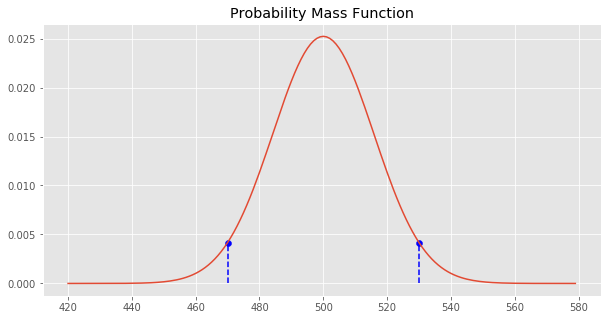

In [16]:
xs = [x for x in range(420, 580)]
plt.figure(figsize=(10, 5))
plt.plot(xs,[rv.pmf(x) for x in xs],'-')
plt.title('Probability Mass Function')
plt.scatter([470, 530], [rv.pmf(470), rv.pmf(530)], color = 'blue')
plt.vlines([470, 530], ymin = [0, 0], ymax=[rv.pmf(470), rv.pmf(530)], linestyles='--', color = 'blue')
plt.show()

# 5. 만약 유의 확률이 미리 정한 <font color=red>특정한 기준값보다 작은 경우</font>를 생각하자. 이 기준값을 <font color=red>유의 수준(significance level)</font>이라고 하는 데 보통 1% 혹은 5% 정도의 작은 값을 지정한다. 유의 확률이 유의 수준으로 정한 값(예 1%)보다도 작다는 말은 해당 검정 통계 분포에서 이 검정 통계치(혹은 더 극단적인 경우)가 나올 수 있는 확률이 아주 작다는 의미이므로 가장 근본이 되는 가설 즉, 귀무 가설이 틀렸다는 의미이다. 따라서 이 경우에는 귀무 가설을 <font color=red>기각(reject)</font>한다.

--------

# 6.  만약 유의 확률이 유의 수준보다 <font color=red>크다면</font> 해당 검정 통계 분포에서 이 검정 통계치가 나오는 것이 불가능하지만은 않다는 의미이므로 귀무 가설을 기각할 수 없다. 따라서 이 경우에는 귀무 가설을 <font color=red>채택(accept)</font>한다.

> ### 앞면이 530회 나온 경우, 유의확률이 0.05보다 크므로 귀무가설을 기각하지 못한다.
### 따라서 이 동전은 공정한 동전이 아니라고 말할 수 없다.

-------------

### 그렇다면 기각할 수 있는 구간은 어떤 구간일까?

In [17]:
## ppf (cmf의 역함수) 함수를 이용해서 유의수준에 해당되는 검정통계량을 구해보자.

rv.ppf(0.025), rv.ppf(0.975)

(469.0, 531.0)

In [19]:
## 유의확률이 0.05에 근사한다.

1-rv.cdf(531) + rv.cdf(469)

0.04998452350277943

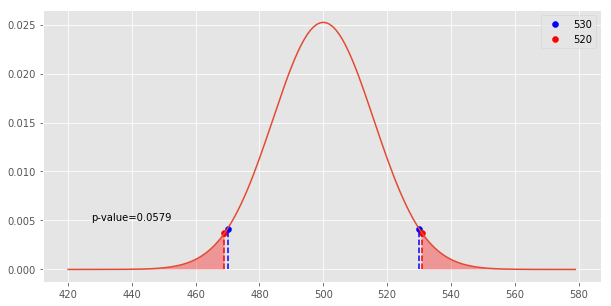

In [21]:
xs = [x for x in range(420, 580)]
plt.figure(figsize=(10, 5))
plt.plot(xs,[rv.pmf(x) for x in xs],'-')

plt.scatter([470, 530], [rv.pmf(470), rv.pmf(530)], color = 'blue', label = '530')
plt.vlines([470, 530], ymin = [0, 0], ymax=[rv.pmf(470), rv.pmf(530)], linestyles='--', color = 'blue')


## (469.0, 531.0) 위치를 찾아보자.

plt.scatter([469, 531], [rv.pmf(469), rv.pmf(531)], color = 'red', label = '520')
plt.vlines([469, 531], ymin = [0, 0], ymax=[rv.pmf(469), rv.pmf(531)], linestyles='--', color = 'red')
plt.fill_between(list(range(420, 470)), [rv.pmf(x) for x in range(420, 470)], facecolor='red', alpha=0.35)
plt.fill_between(list(range(531, 580)), [rv.pmf(x) for x in range(531, 580)], facecolor='red', alpha=0.35)
plt.text(440, 0.005, "p-value=%s" % round(1-rv.cdf(530) + rv.cdf(470), 4), horizontalalignment='center')
plt.legend()
plt.show()

> ### 동전이 531회 이상 앞면이 나왔다면 이 동전은 공정하다는 귀무가설을 기각할 수 있게된다.

------------

## 실험을 통한 유의수준 확인
- 주사위를 1000번 던지는 실험을 1000번하면, 5% 유의수준에서 기각이 되는 실험은 몇번이나 나올까?
    - 1) 주사위를 1000번 던지는 함수를 작성한다.
    - 2) 각 실험에서 유의 수준에 해당되는 검정 통계량 값이 나왔을 때 True, False를 return하는 함수를 작성한다.
    - 3) 1000번 실험한 뒤 몇 번이나 기각되었는지 세어본다.

In [22]:
def run_experiment():
    import random
    """동전을 1000번 던져서, True = 앞면, False = 뒷면"""
    return [random.random() < 0.5 for _ in range(1000)]

In [23]:
def reject_fairness(experiment):
    """유의수준을 5%로 설정"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [24]:
import random
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
print(num_rejections)

46


--------